Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
!pip install opencv-python

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!unzip flowers.zip

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# load data

In [4]:
# !cp -r -v "/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers" "flowers"

'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers' -> 'flowers'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion' -> 'flowers/dandelion'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion/2457473644_5242844e52_m.jpg' -> 'flowers/dandelion/2457473644_5242844e52_m.jpg'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion/19551343814_48f764535f_m.jpg' -> 'flowers/dandelion/19551343814_48f764535f_m.jpg'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion/14614655810_9910e6dbd6_n.jpg' -> 'flowers/dandelion/14614655810_9910e6dbd6_n.jpg'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion/18876985840_7531dc8e6a.jpg' -> 'flowers/dandelion/18876985840_7531dc8e6a.jpg'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion/136999986_e410a68efb_n.jpg' -> 'flowers/dandelion/136999986_e410a68efb_n.jpg'
'/content/drive/My Drive/AI-DL-ASSIGNMENT-DATASETS/flowers/dandelion/1426682852_e62169221

In [349]:
DATADIR ='./flowers'
CATEGORIES = ['daisy', 'dandelion','rose','sunflower','tulip']


In [350]:
IMG_HEIGHT = 100
IMG_WIDTH = 100

# creating dataset

In [351]:
dataset = []
def create_dataset():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        code=cv2.COLOR_BGR2RGB
        dst = cv2.cvtColor(img_array, code)
        new_array = cv2.resize(dst, (IMG_HEIGHT,IMG_WIDTH))
        dataset.append([new_array, class_num])
      except Exception as e:
        pass
create_dataset()


In [352]:
len(dataset)

4323

# shuffling the data

In [353]:
import random
random.shuffle(dataset)

In [354]:
for sample in dataset[:10]:
  print(sample[1])

2
1
0
3
3
3
1
3
2
2


# creating features and label arrays

In [355]:
data = []
labels = []

In [356]:
for features, label in dataset:
  data.append(features)
  labels.append(label)

data = np.array(data).reshape(-1, IMG_HEIGHT,IMG_WIDTH,3)
labels = np.array(labels)

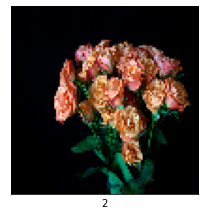

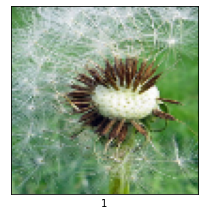

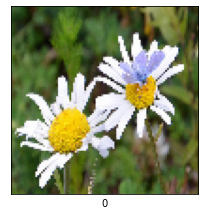

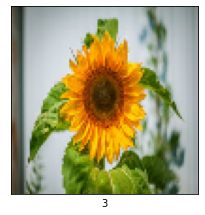

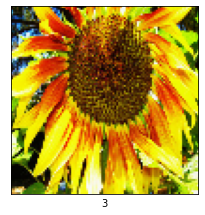

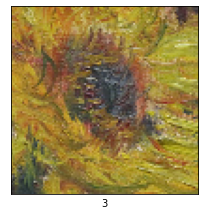

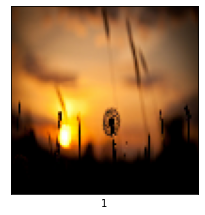

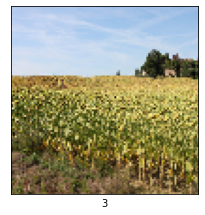

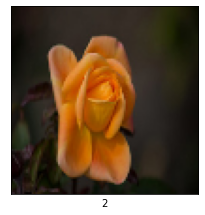

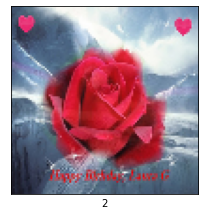

In [357]:
for i in range(10):
   plt.figure(figsize=(20,20))    
   plt.subplot(5,5,i+1)    
   plt.xticks([])    
   plt.yticks([])
   plt.xlabel(labels[i])    
   plt.grid(True)    
   plt.imshow(data[i])    
   plt.show()

# splitting the data into training testing

In [409]:
train_data = data[:3458]
test_data  = data[3458:]

In [410]:
train_labels = labels[:3458]
test_labels = labels[3458:]

In [411]:
# x_train = data[:2594]
# y_train = labels[:2594]

In [412]:
# x_validate = data[2594:3459]
# y_validate = labels[2594:3459]

In [413]:
# x_test= data[3459:]
# y_test=labels[3459:]

# normalizing the data

In [414]:
train_data= np.reshape(train_data, (train_data.shape[0], -1))
train_data = train_data.astype('float32') / 255

In [415]:
test_data= np.reshape(test_data, (test_data.shape[0], -1))
test_data = test_data.astype('float32') / 255

In [416]:
# x_train= np.reshape(x_train, (x_train.shape[0], -1))
# # x_train = x_train.reshape(2594, 100, 100, 3)

In [417]:
# x_train = x_train.astype('float32') / 255

In [418]:
# x_validate = np.reshape(x_validate,(x_validate.shape[0],-1))
# # x_validate = x_validate.reshape(865, 100, 100, 3)

In [419]:
# x_validate = x_validate.astype('float32') / 255

In [420]:
# x_test= np.reshape(x_test, (x_test.shape[0], -1))

In [421]:
# x_test = x_test.astype('float32') / 255

# encoding the labels

In [422]:
from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_validate = to_categorical(y_validate)
# y_test = to_categorical(y_test)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [423]:
train_data.shape

(3458, 30000)

In [424]:
train_labels.shape

(3458, 5)

In [425]:
test_data.shape

(865, 30000)

In [426]:
test_labels.shape

(865, 5)

# building the model

In [427]:
# from keras import models
# from keras import layers
# network = models.Sequential()
# network.add(layers.Dense(1024, activation='relu', input_shape=(x_train.shape[1],)))
# # network.add(layers.Dense(1024, activation='relu'))
# network.add(layers.Dense(512, activation='relu'))
# network.add(layers.Dense(256, activation='relu'))
# # network.add(layers.Dense(32, activation='relu'))
# # network.add(layers.Dense(16, activation='relu'))
# network.add(layers.Dense(128, activation='relu'))
# network.add(layers.Dense(5, activation='softmax'))
# network.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

# # model = models.Sequential()
# # model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100,100,3)))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# # model.add(layers.Flatten())
# # model.add(layers.Dense(64, activation='relu'))
# # model.add(layers.Dense(5, activation='softmax'))
# network.summary()

In [428]:
from keras import models
from keras import layers
from keras import regularizers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(1024, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  # model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.Dropout(0.5))
  # network.add(layers.Dense(64, activation='relu'))
  # model.add(layers.Dropout(0.5))
  model.add(layers.Dense(5, activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [429]:
build_model()

In [430]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
  train_data[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_labels = np.concatenate(
  [train_labels[:i * num_val_samples],
  train_labels[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_labels,
  epochs=num_epochs, batch_size=256, verbose=1)
  val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=1)
  all_scores.append(val_acc)

processing fold # 0
Epoch 1/500
11/11 [==============================] - 1s 52ms/step - loss: 55.7771 - accuracy: 0.2187
Epoch 2/500
11/11 [==============================] - 1s 46ms/step - loss: 3.8073 - accuracy: 0.2484
Epoch 3/500
11/11 [==============================] - 0s 44ms/step - loss: 1.7961 - accuracy: 0.2759
Epoch 4/500
11/11 [==============================] - 0s 45ms/step - loss: 1.8140 - accuracy: 0.2423
Epoch 5/500
11/11 [==============================] - 0s 45ms/step - loss: 1.6481 - accuracy: 0.2500
Epoch 6/500
11/11 [==============================] - 0s 45ms/step - loss: 1.7302 - accuracy: 0.2420
Epoch 7/500
11/11 [==============================] - 0s 45ms/step - loss: 1.6993 - accuracy: 0.2538
Epoch 8/500
11/11 [==============================] - 1s 46ms/step - loss: 1.6617 - accuracy: 0.2406
Epoch 9/500
11/11 [==============================] - 1s 46ms/step - loss: 1.8395 - accuracy: 0.2357
Epoch 10/500
11/11 [==============================] - 1s 48ms/step - loss: 1.63

In [431]:
all_scores

[0.3715277910232544,
 0.43865740299224854,
 0.4548611044883728,
 0.40509259700775146]

# training and testing

In [432]:
model = build_model()
model.fit(train_data, train_labels,epochs=500, batch_size=256, verbose=1)


Epoch 1/500
14/14 [==============================] - 1s 55ms/step - loss: 71.6055 - accuracy: 0.2121
Epoch 2/500
14/14 [==============================] - 1s 47ms/step - loss: 3.1202 - accuracy: 0.2759
Epoch 3/500
14/14 [==============================] - 1s 46ms/step - loss: 1.7168 - accuracy: 0.2902
Epoch 4/500
14/14 [==============================] - 1s 48ms/step - loss: 1.8357 - accuracy: 0.2442
Epoch 5/500
14/14 [==============================] - 1s 48ms/step - loss: 2.0737 - accuracy: 0.2364
Epoch 6/500
14/14 [==============================] - 1s 48ms/step - loss: 1.8367 - accuracy: 0.2544
Epoch 7/500
14/14 [==============================] - 1s 46ms/step - loss: 2.0392 - accuracy: 0.2614
Epoch 8/500
14/14 [==============================] - 1s 46ms/step - loss: 1.6942 - accuracy: 0.2699
Epoch 9/500
14/14 [==============================] - 1s 45ms/step - loss: 1.5935 - accuracy: 0.2729
Epoch 10/500
14/14 [==============================] - 1s 48ms/step - loss: 1.7220 - accuracy: 0.276

ValueError: ignored

In [434]:
results = model.evaluate(test_data, test_labels)

28/28 [==============================] - 0s 8ms/step - loss: 2.3871 - accuracy: 0.4763


In [438]:
pred = model.predict(x_test)

In [440]:
pred[0]

array([1.0129998e-05, 9.9998295e-01, 3.2723481e-06, 3.6408359e-08,
       3.6263823e-06], dtype=float32)

array([[0.02475954, 0.79230005, 0.0627166 , 0.00243612, 0.11778773]],
      dtype=float32)

# NOTE: sir i need help as i couldn't understand this assignment. it would be a big help if i get some feedback on why accuracy was so low. and how to predict